<a href="https://colab.research.google.com/github/BOOSAMADHANMOHANREDDY/UPGRAD/blob/main/Project_2_Electric_Vehicle_Sales_by_State_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2 -  Electric Vehicle Sales by State in India**

# **Project Objective:** Analyze and predict the sales of Electric Vehicles (EV) by state in India using Machine Learning.

In [ ]:
# prompt: **Steps Involved in this Project:**
# 1. Data Collection: Load and inspect the dataset.
# 2. Data Preprocessing: Handle missing values, convert date formats, and
# perform feature engineering.
# 3. Exploratory Data Analysis (EDA): Visualize trends and relationships between
# variables.
# 4. Feature Engineering: Create new features from the date column and encode
# categorical variables.
# 5. Modeling: Build a regression model to predict EV sales.
# 6. Evaluation: Evaluate the model performance and interpret the results.
# 7. Visualization: Visualize the results and trends using graphs and charts.



# **Step 1: Data Collection**

In [2]:
# Import necessary libraries and Loan the dataset
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Electric_Vehicle_Sales_by_State_in_India.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [9]:
## Identify rows and columns
print(df.shape,df.columns)

(96845, 8) Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


In [10]:
df.head() # first 5 rows of the dataset

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [13]:
# the data contains information from 2014 to present
df.Year.value_counts()

,count
Year,
2019.0,10315
2023.0,10279
2018.0,10225
2022.0,10021
2017.0,9799
2016.0,9348
2021.0,9249
2015.0,9052
2014.0,9022


In [14]:
# almost every state and UT are present in the data.
df.State.value_counts()

,count
State,
Maharashtra,4912
Karnataka,4830
Uttar Pradesh,4557
Rajasthan,4552
Gujarat,4517
West Bengal,4196
Tamil Nadu,4063
Odisha,4027
Haryana,3842


In [15]:
# below are the class of vehicles being sold in the Indian market.
df.Vehicle_Class.value_counts()

,count
Vehicle_Class,
MOTOR CAR,4111
M-CYCLE/SCOOTER,4101
GOODS CARRIER,4096
MOTOR CAB,3985
BUS,3813
...,...
SEMI-TRAILER (COMMERCIAL),18
X-RAY VAN,12
MOTOR CYCLE/SCOOTER-WITH TRAILER,9


In [17]:
# The category of vehicles being sold in Indian markets.
df.Vehicle_Category.value_counts()

,count
Vehicle_Category,
Others,54423
2-Wheelers,13121
3-Wheelers,11491
Bus,9119
4-Wheelers,8691


In [18]:
 # The types of vehicles being sold in Indian markets.
df.Vehicle_Type.value_counts()

,count
Vehicle_Type,
Others,54423
2W_Personal,11700
Bus,7026
4W_Shared,4580
4W_Personal,4111
3W_Shared,3786
3W_Goods,3208
Institution Bus,2093
3W_Shared_LowSpeed,1951


**Step 2 : Data Preprocessing- Handling  missing values ,covert data frmats and perform feature engineering**

In [19]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [68]:
check_duplicates=df.duplicated().sum()
print(check_duplicates)

0


In [67]:
check_missing_values=df.isnull().sum()


In [65]:
# Check for missing values
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
Month                0
Day                  0
dtype: int64


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  float64       
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
 8   Month              96845 non-null  int32         
 9   Day                96845 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(5)
memory usage: 6.6+ MB


In [24]:
# Fill missing values (if any) using median for numerical columns or mode for categorical columns
df.fillna(df.mode().iloc[0], inplace=True)
print(df.fillna(df.mode().iloc[0], inplace=True))

None


**Step 3: Exploratory Data Analysis (EDA) Visualize trends in EV sales over time, across states, and vehicle categories.**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

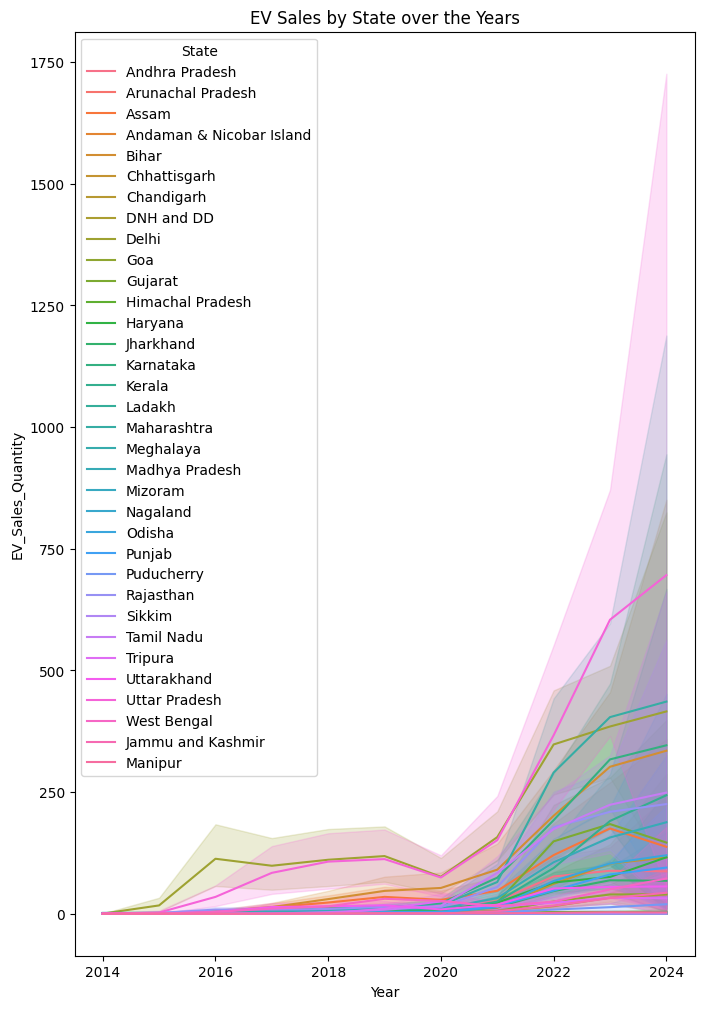

In [31]:
# Plot EV sales over the years
plt.figure(figsize=(8, 12))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity',
hue='State')
plt.title('EV Sales by State over the Years')
plt.show()

<ipython-input-33-8c51b7d6813a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',


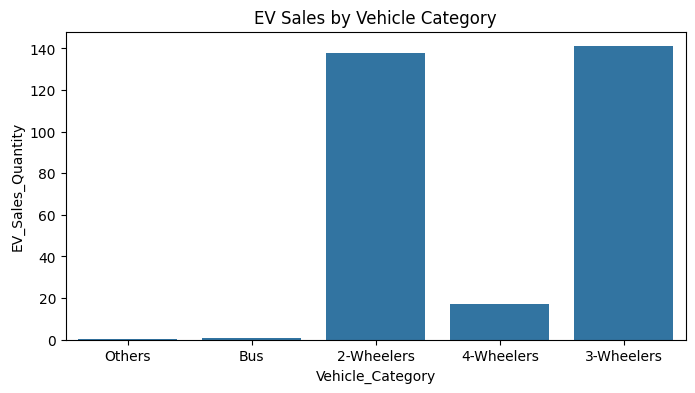

In [33]:
# Plot sales by vehicle category
plt.figure(figsize=(8, 4))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',
data=df, ci=None)
plt.title('EV Sales by Vehicle Category')
plt.show()

**Step 4: Feature Engineering-Create new features such as month and day from the Date column and encode categorical variables.**

In [34]:
# Extract Month and Day from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [35]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State',
'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],
drop_first=True)

In [37]:
# Drop unnecessary columns like Date, Month_Name (if already extracted into numerical values)
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

**Step 5: Modeling - Use a regression model (e.g., Random Forest Regressor) to predict EV sales.**


In [38]:
#import libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
# Split the data into features and target variable
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']
print(X,y)

         Year  Month  Day  State_Andhra Pradesh  State_Arunachal Pradesh  \
0      2014.0      1    1                  True                    False   
1      2014.0      1    1                  True                    False   
2      2014.0      1    1                  True                    False   
3      2014.0      1    1                  True                    False   
4      2014.0      1    1                  True                    False   
...       ...    ...  ...                   ...                      ...   
96840  2023.0     12    1                 False                    False   
96841  2023.0     12    1                 False                    False   
96842  2023.0     12    1                 False                    False   
96843  2023.0     12    1                 False                    False   
96844  2023.0     12    1                 False                    False   

       State_Assam  State_Bihar  State_Chandigarh  State_Chhattisgarh  \
0            F

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [42]:
print(# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test)

         Year  Month  Day  State_Andhra Pradesh  State_Arunachal Pradesh  \
80684  2023.0     10    1                 False                    False   
83474  2017.0     11    1                 False                    False   
56483  2023.0      7    1                 False                    False   
78225  2021.0     10    1                 False                    False   
39394  2022.0      5    1                 False                    False   
...       ...    ...  ...                   ...                      ...   
6265   2021.0      1    1                 False                    False   
54886  2021.0      7    1                 False                    False   
76820  2019.0     10    1                 False                    False   
860    2015.0      1    1                 False                    False   
15795  2022.0      2    1                 False                    False   

       State_Assam  State_Bihar  State_Chandigarh  State_Chhattisgarh  \
80684        F

In [43]:
# Instantiate the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)

In [61]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Make predictions
y_pred = model.predict(X_test)

In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


## Step 6: Model Evaluation - Check how well the model performs on the test set.

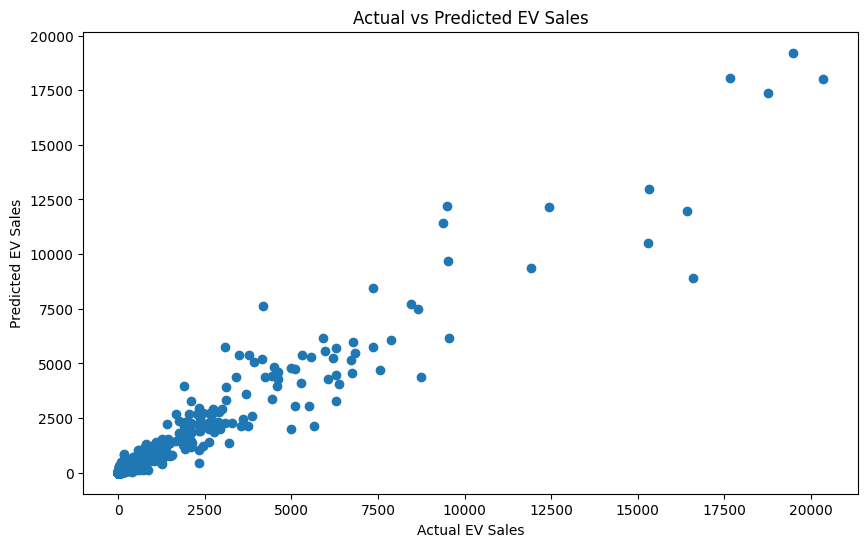

In [47]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

In [48]:
# Check feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)

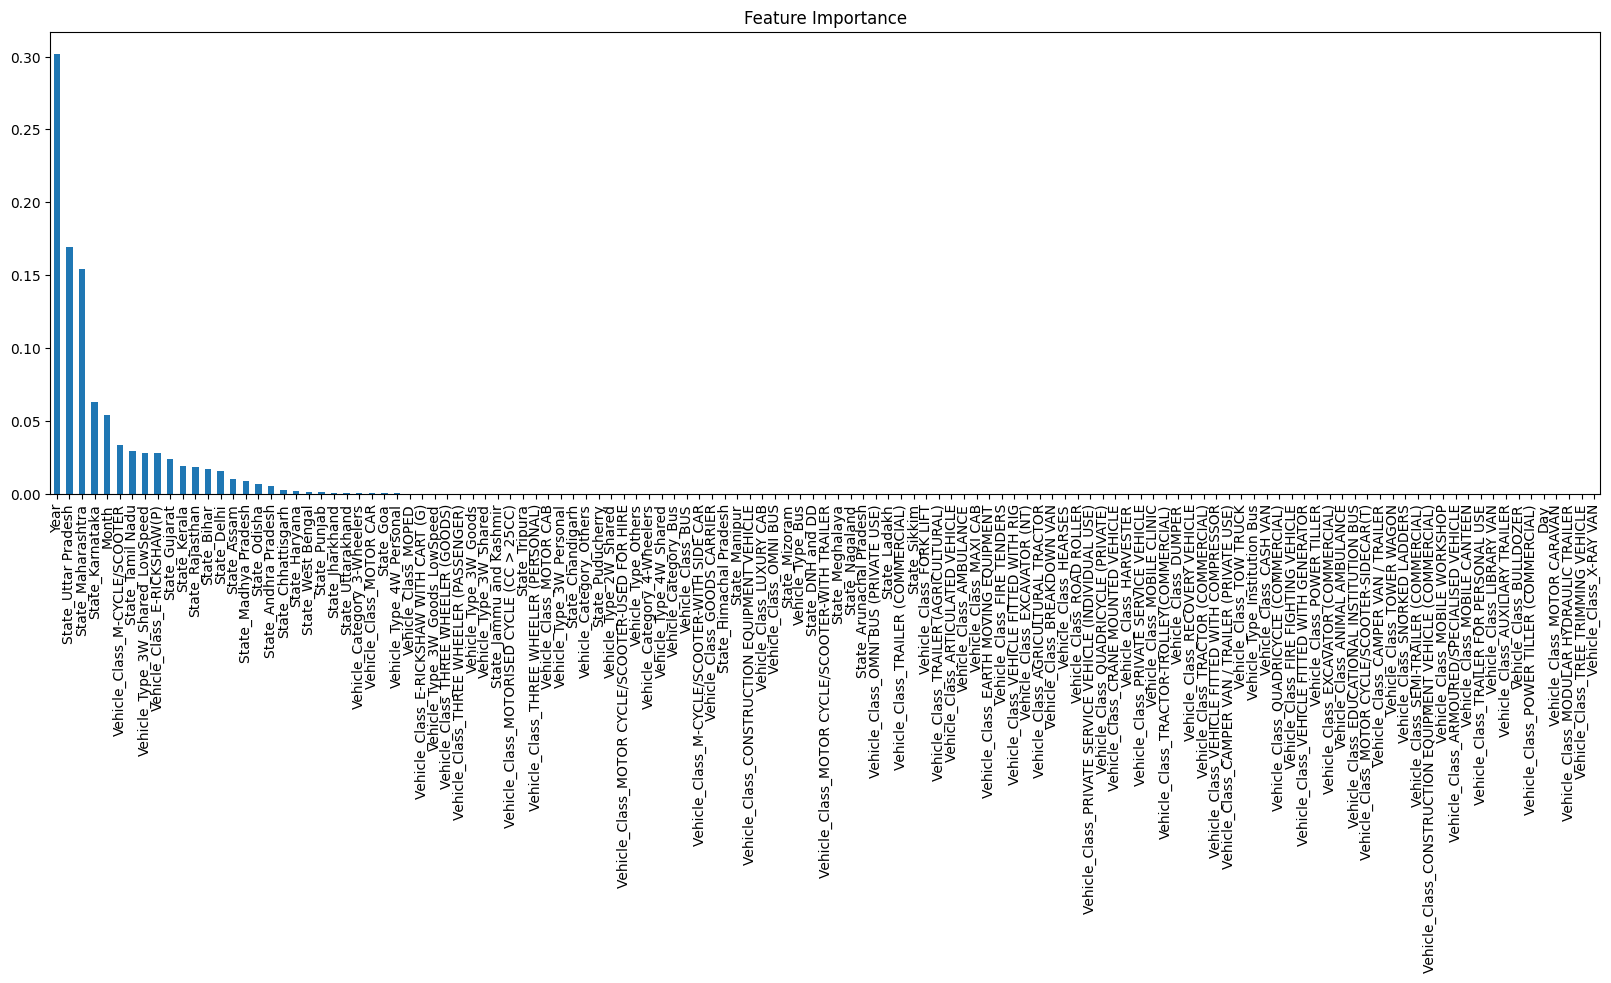

In [60]:
# Plot the most important features
plt.figure(figsize=(20, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

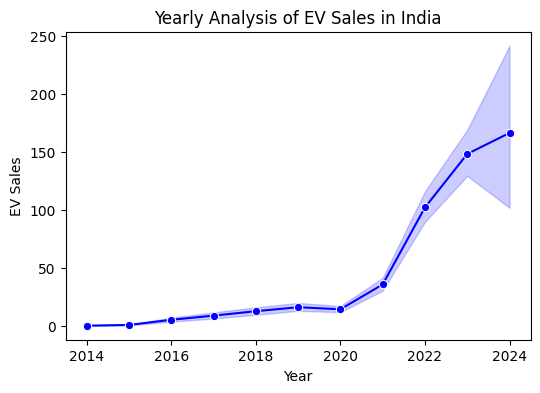

In [51]:
## Visualisation
plt.figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df,
marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales');

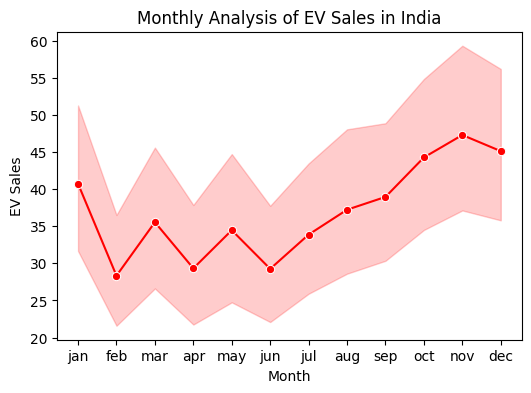

In [52]:
plt.figure(figsize=(6,4))
plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df,
marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales');

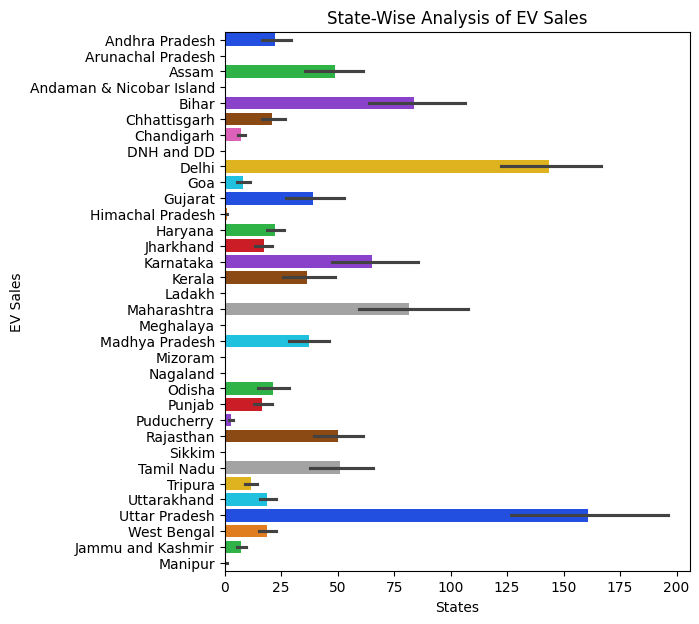

In [53]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df,
hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales');


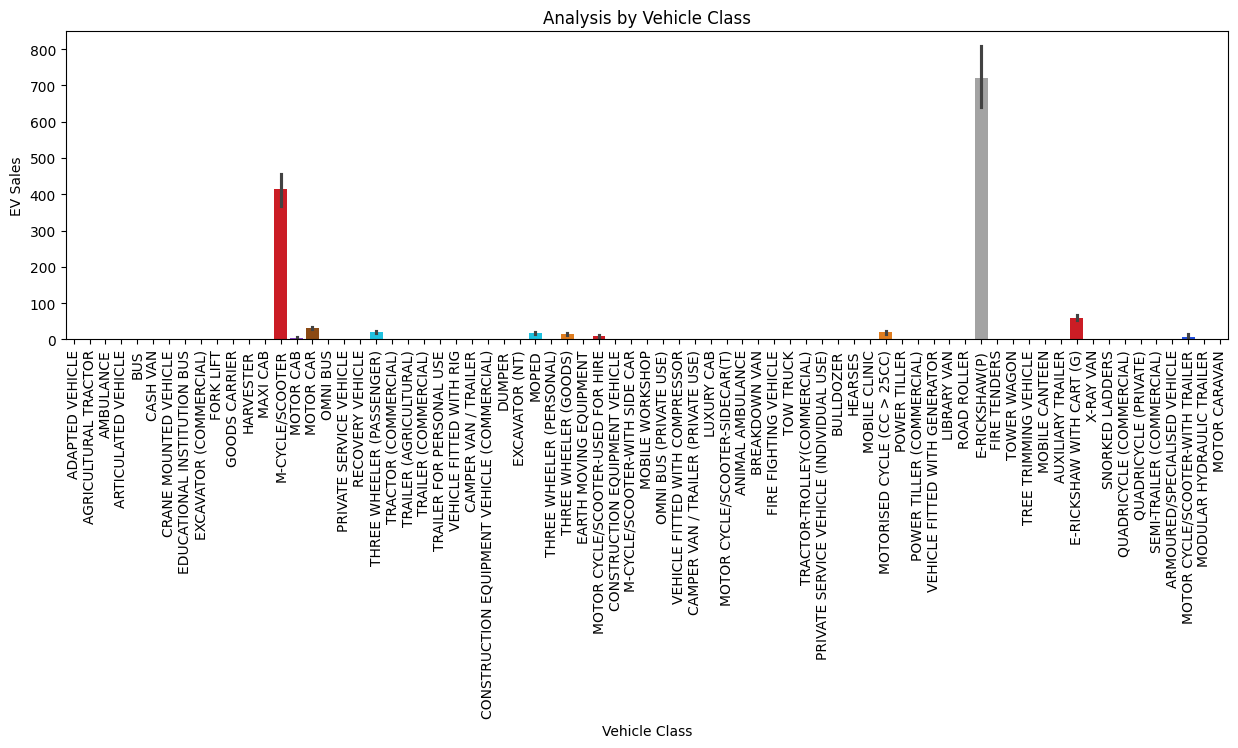

In [54]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity',data=df,
hue='Vehicle_Class', palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);


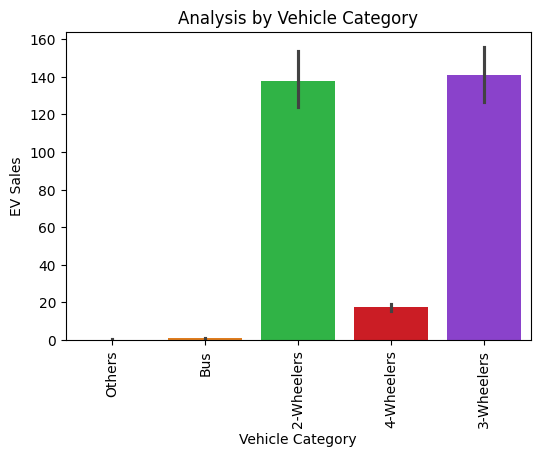

In [57]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category',
y='EV_Sales_Quantity',data=df, hue='Vehicle_Category',
palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);


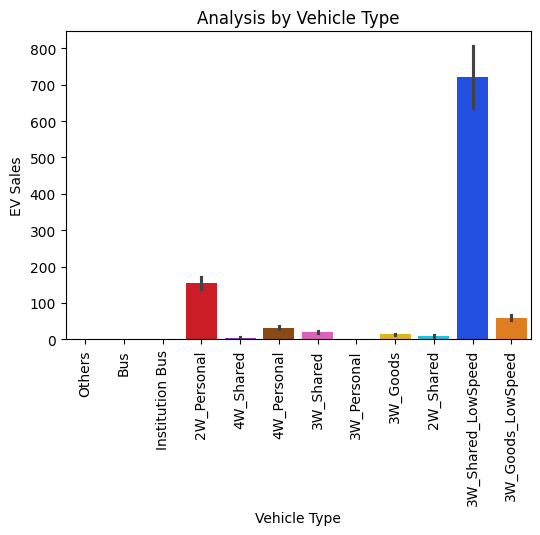

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=df,
hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);


# Step 7: Observations and Conclusion

*The data contains 96845 rows and 8 columns.

*The data contains information 2014 to 2024.

*Comapare  Satewise Sales, Maharashtra Sales 4912 and Karnataka Sales 4830 have high sales and Andaman & Nicobar Island Sales 1226 and Ladakh Sales 1063 have low sales.

*Coming to Vehicle Clases MOTOR CARS have High sales(4111) and MODULAR HYDRAULIC TRAILER OR MOTOR CARAVAN have Low sales(3).

*The machine learning model helps in understanding the factors affecting Electric Vehicle sales across different states and predicting future sales based on historicaldata.

*Feature Importance gives insight into which factors (e.g., State, Vehicle Category) have the highest impact on sales

***Data Preprocessing:** in the data there is no null and missing values.

*** from Feature Engineering:** Created new columns from the Date column and
encoded categorical variables for random forest Regressor model

***From Modeling:** Built a Random Forest Regressor model to predict EV sales and evaluated its performance using RMSE (Root Mean Squared Error).
Root Mean Squared Error: 130.58175227721011

***Visualization:** Visualized sales trends and feature importance using bar plots and scatter plots thats shows very nice especialy sns bar chart sate wise sales diagram shows clear information.
